# Does It Rain More in Seattle or Portland?
This notebook analyzes daily precipitation data (2018–2022) to determine whether Seattle receives more rain than Portland. We’ll explore rainfall amount, frequency, and intensity using NOAA data.


In [646]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# load and inspect data
We begin by loading daily precipitation records for Seattle and Portland. Each dataset includes the date and the amount of precipitation 

In [647]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-5100/refs/heads/main/weather/seattle_rain.csv')

In [648]:
import pandas as pd

df_seattle = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/refs/heads/main/weather/seattle_rain.csv'
)


In [649]:
df_stlouis = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/refs/heads/main/weather/stl_rain.csv'
)

In [650]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [651]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [652]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [653]:
df_portland = pd.read_csv(
    "https://raw.githubusercontent.com/brunamportoDS/Weather/refs/heads/main/data/portland_rain.csv"
)

In [654]:
print(df_seattle.shape)

(1658, 10)


In [655]:
df_portland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1822 non-null   object 
 1   NAME     1822 non-null   object 
 2   DATE     1822 non-null   object 
 3   PRCP     1822 non-null   float64
 4   SNOW     1421 non-null   float64
 5   SNWD     636 non-null    float64
 6   WESD     47 non-null     float64
 7   WESF     383 non-null    float64
dtypes: float64(5), object(3)
memory usage: 114.0+ KB


# Both datasets contain daily observations with similar structure

In [656]:
print(df_portland.shape)

(1822, 8)


# data cleaning and preparation, including convert date columns to datetime format, add 'city' label, include averages on missing values and combine datasets

In [657]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

C:\Users\bruna\AppData\Local\Temp\ipykernel_6556\3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [658]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [659]:
df_portland['DATE'] = pd.to_datetime(df_portland['DATE'])

In [660]:
df_portland['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1817   2022-12-27
1818   2022-12-28
1819   2022-12-29
1820   2022-12-30
1821   2022-12-31
Name: DATE, Length: 1822, dtype: datetime64[ns]

In [661]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [662]:
df_seattle['DATE'].min

<bound method Series.min of 0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]>

In [663]:
df_seattle['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [664]:
df_seattle['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [665]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [666]:
df_portland['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

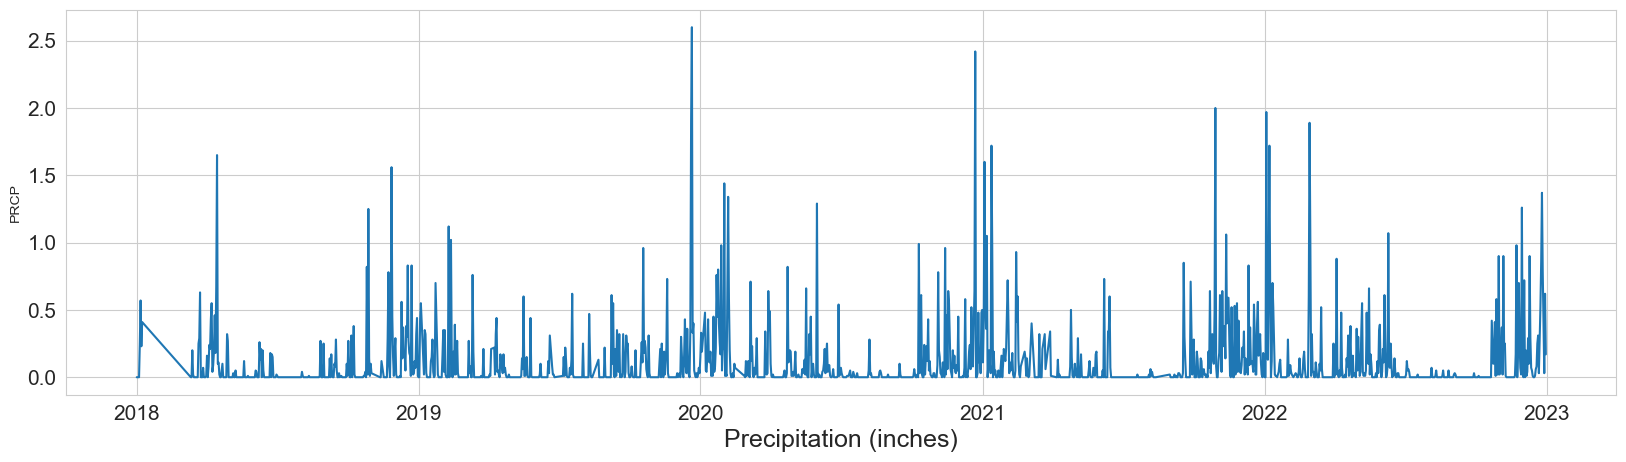

In [667]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.xlabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

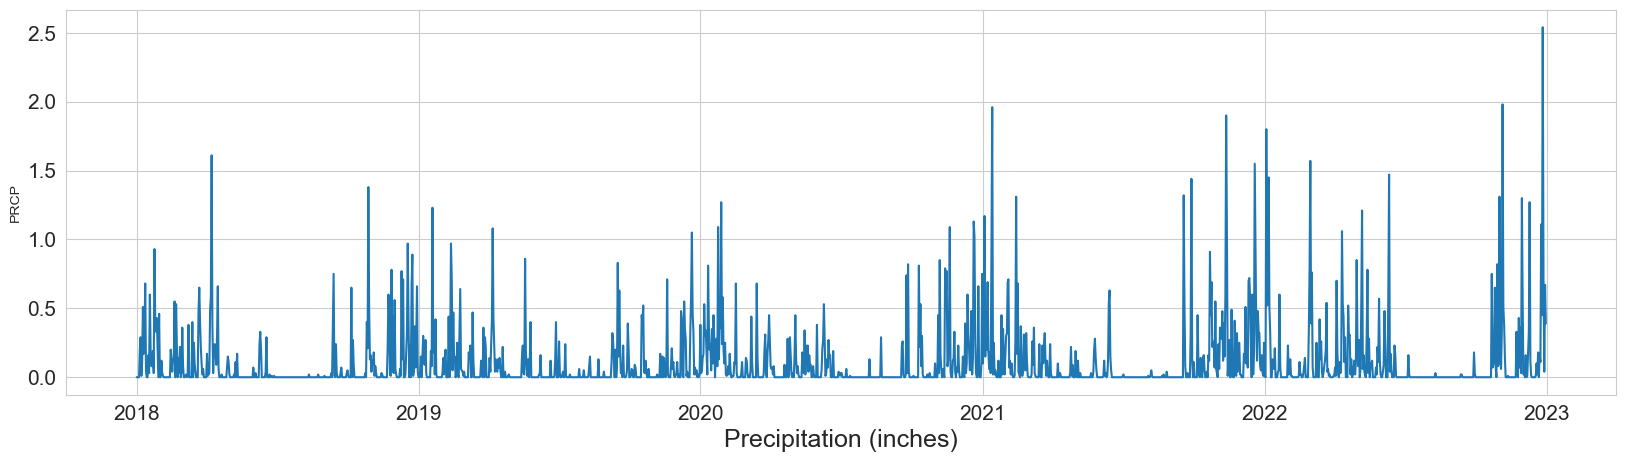

In [668]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_portland, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.xlabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

In [669]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [670]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [671]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [672]:
dfh = df_portland[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [673]:
dfh.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.19,0.25


In [674]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

In [675]:
dfh = pd.melt(dfh, id_vars='DATE', var_name='city', value_name='precipitation')

In [676]:
dfh.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,0.19


In [677]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'STL'

In [678]:
dfh.loc[dfh['city'] == 'PRCP_x', 'city'] = 'POR'

In [679]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [680]:
dfh.loc[dfh['city'] == 'PRCP_y', 'city'] = 'SEA'

In [681]:
dfh.head()

,DATE,city,precipitation
0,2018-01-01,POR,0.00
1,2018-01-02,POR,0.00
2,2018-01-03,POR,0.00
3,2018-01-04,POR,0.00
4,2018-01-05,POR,0.19


In [682]:
dfh.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


In [683]:
df = df.rename(columns={'DATE':'date'})

In [684]:
dfh = dfh.rename(columns={'DATE':'date'})

In [685]:
dfh.head()

,date,city,precipitation
0,2018-01-01,POR,0.00
1,2018-01-02,POR,0.00
2,2018-01-03,POR,0.00
3,2018-01-04,POR,0.00
4,2018-01-05,POR,0.19


In [686]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3458 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [687]:
dfh.notna().sum()

date             3652
city             3652
precipitation    3458
dtype: int64

In [688]:
dfh.isna().sum()

date               0
city               0
precipitation    194
dtype: int64

In [689]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [690]:
dfh.loc[dfh['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [691]:
dfh.loc[dfh['city'] == 'POR', 'precipitation'].isna().sum()

np.int64(4)

In [692]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [693]:
dfh['day_of_year'] = pd.DatetimeIndex(dfh['date']).day_of_year

In [694]:
dfh.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,POR,0.00,1
1,2018-01-02,POR,0.00,2
2,2018-01-03,POR,0.00,3
3,2018-01-04,POR,0.00,4
4,2018-01-05,POR,0.19,5
5,2018-01-06,POR,0.29,6
6,2018-01-07,POR,0.01,7
7,2018-01-08,POR,0.11,8
8,2018-01-09,POR,0.51,9
9,2018-01-10,POR,0.17,10


# The combined dataframe has one row per city per date, allowing monthly comparisons.

In [695]:
mean_day_precipitation = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

In [696]:
mean_day_precipitation_= dfh.loc[
    dfh['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

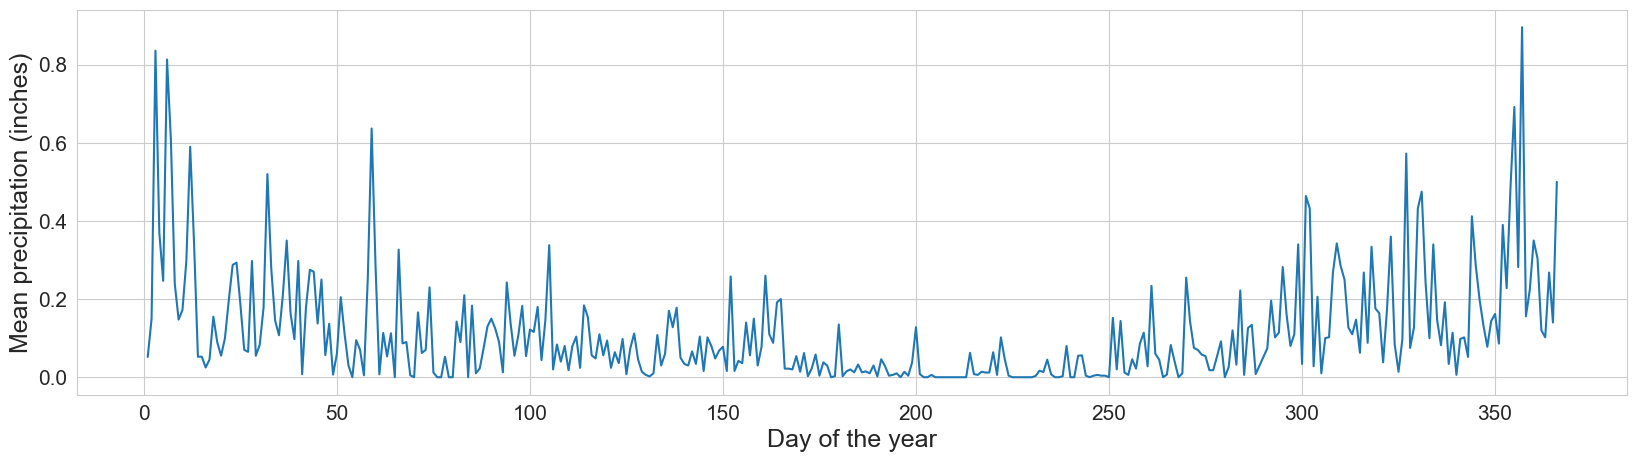

In [697]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

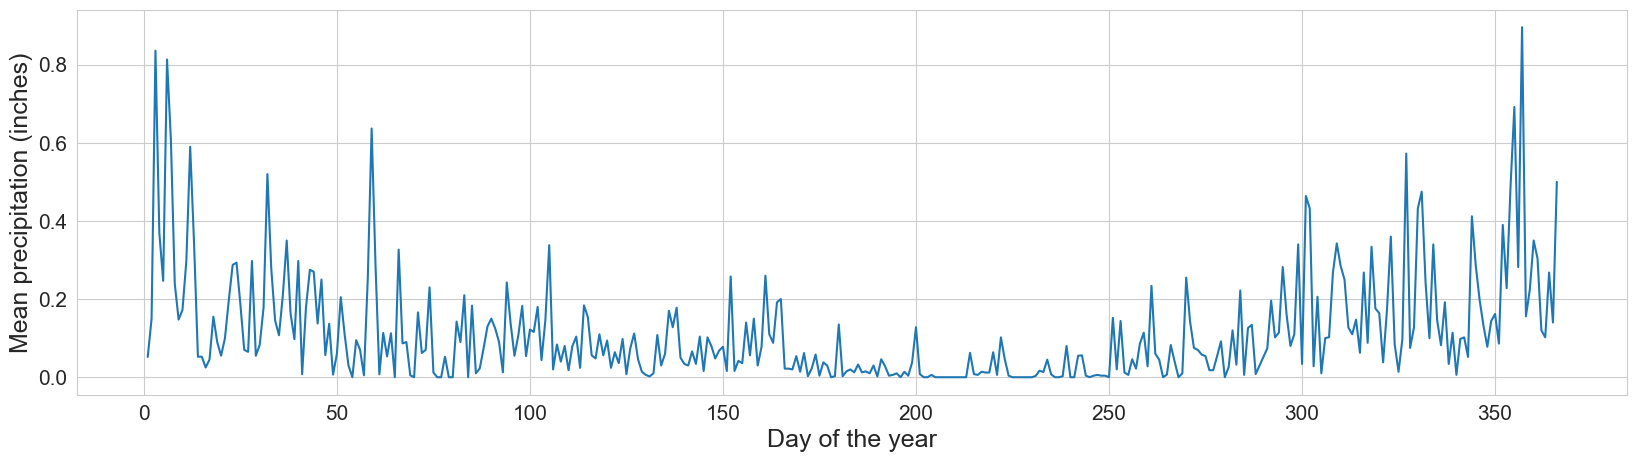

In [698]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

In [699]:
dfh.head()

,date,city,precipitation,day_of_year
0,2018-01-01,POR,0.00,1
1,2018-01-02,POR,0.00,2
2,2018-01-03,POR,0.00,3
3,2018-01-04,POR,0.00,4
4,2018-01-05,POR,0.19,5


In [700]:
dfh['precipitation'].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [701]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [702]:
indices = np.where(dfh['precipitation'].isna() == True)[0]

In [703]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

In [704]:
for index in indices:
    dfh.loc[index, 'precipitation'] = mean_day_precipitation_.loc[df.loc[index,'day_of_year']].values[0]

In [705]:
dfh.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

In [706]:
df.to_csv('clean_seattle_stlouis_weather.csv', encoding='utf-8-sig', index=False)

In [707]:
dfh.to_csv('clean_seattle_portland_weather.csv', encoding='utf-8-sig', index=False)

In [708]:
dfh.head()

,date,city,precipitation,day_of_year
0,2018-01-01,POR,0.00,1
1,2018-01-02,POR,0.00,2
2,2018-01-03,POR,0.00,3
3,2018-01-04,POR,0.00,4
4,2018-01-05,POR,0.19,5


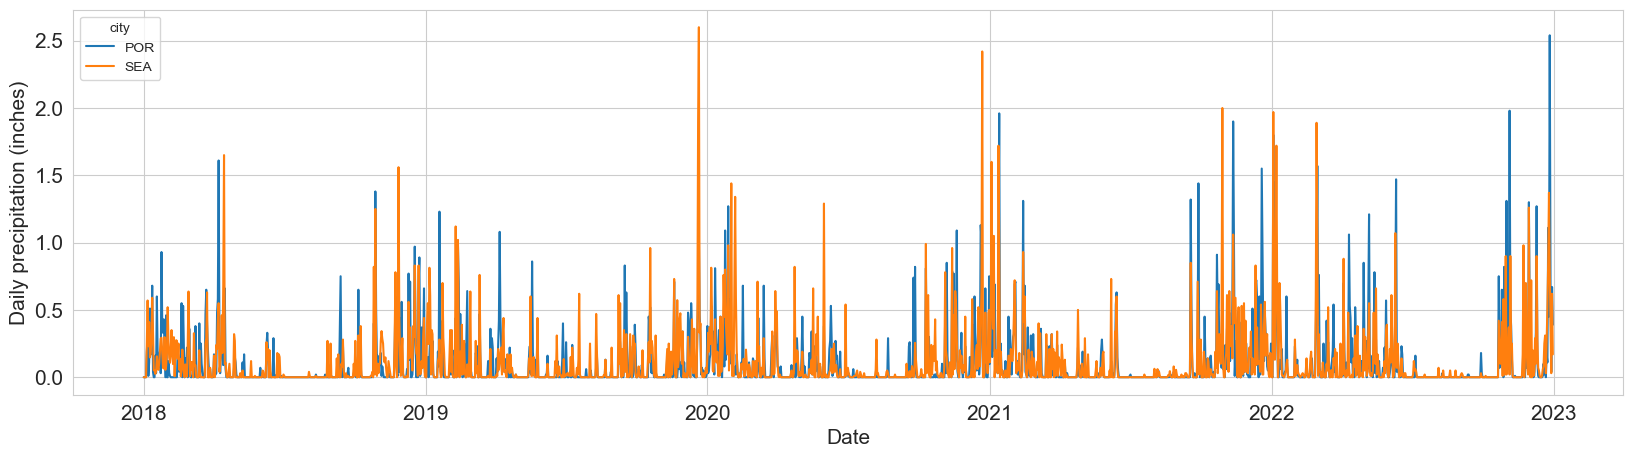

In [709]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=dfh, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

In [710]:
dfh[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
POR         1826.0  0.110551  0.240931  0.0  0.0  0.00  0.11  2.54
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

In [711]:
dfh[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
POR,0.110551
SEA,0.113270


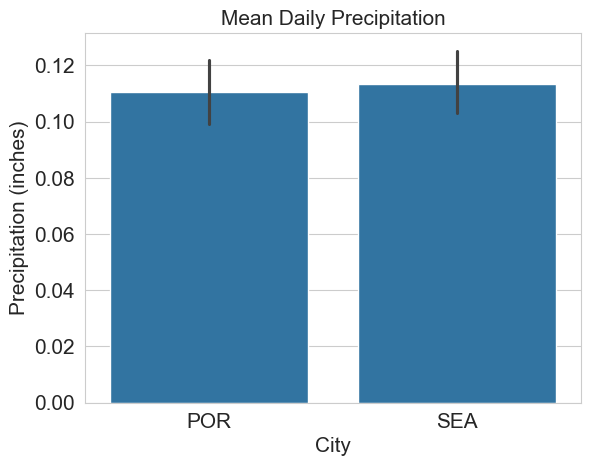

In [712]:
sns.barplot(data=dfh, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

# create month column

In [713]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [714]:
dfh['month'] = pd.DatetimeIndex(df['date']).month

In [715]:
dfh.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,POR,0.00,1,1
1,2018-01-02,POR,0.00,2,1
2,2018-01-03,POR,0.00,3,1
3,2018-01-04,POR,0.00,4,1
4,2018-01-05,POR,0.19,5,1


In [716]:
dfh['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

# exploratory plots to identify seasonal patterns

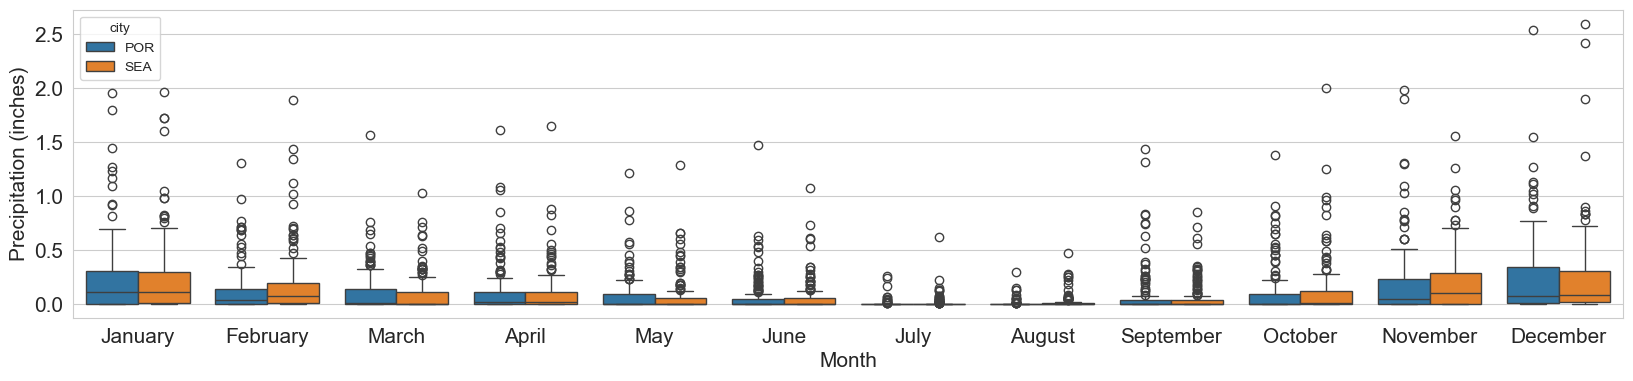

In [717]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=dfh, x='month', y='precipitation', hue='city')
            
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
          
plt.tick_params(labelsize=15)
          
# get month names and set as x-axis tick label
import calendar
month_names = list(calendar.month_name[1:]) #get month names
plt.xticks(ticks=range(12), labels=month_names) 
                   
plt.show()

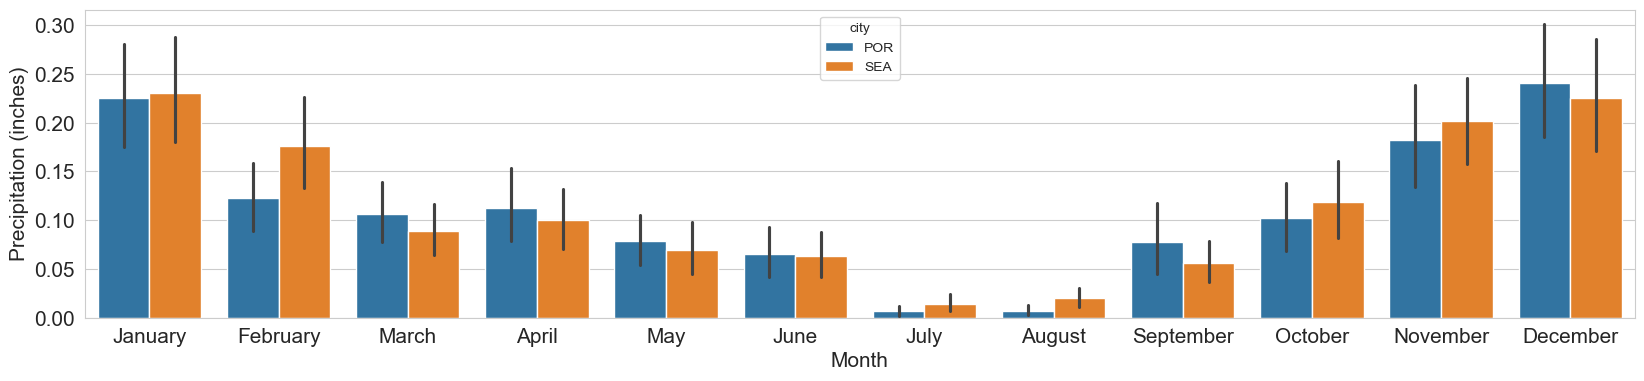

In [718]:
plt.figure(figsize=(20, 4))

sns.barplot(data=dfh, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
          
plt.tick_params(labelsize=15)
          
plt.xticks(ticks=range(12), labels=month_names) 

plt.show()

In [719]:
# Seattle and Portland follow nearly identical monthly rainfall patterns, with slightly higher averages in Seattle during August.

In [720]:
dfh[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
POR  1           0.225290
     2           0.122340
     3           0.106710
     4           0.112267
     5           0.078258
     6           0.065160
     7           0.006516
     8           0.007161
     9           0.078067
     10          0.102619
     11          0.182440
     12          0.240710
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

In [721]:
df['any_precipitation'] = df['precipitation'] > 0

In [722]:
dfh['any_precipitation'] = dfh['precipitation'] > 0

In [723]:
dfh.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,POR,0.00,1,1,False
1,2018-01-02,POR,0.00,2,1,False
2,2018-01-03,POR,0.00,3,1,False
3,2018-01-04,POR,0.00,4,1,False
4,2018-01-05,POR,0.19,5,1,True


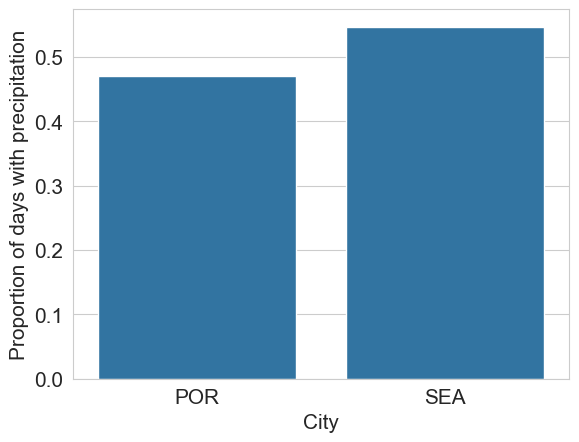

In [724]:
sns.barplot(data=dfh, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of days with precipitation', fontsize=15)
          
plt.tick_params(labelsize=15)
          
plt.show()

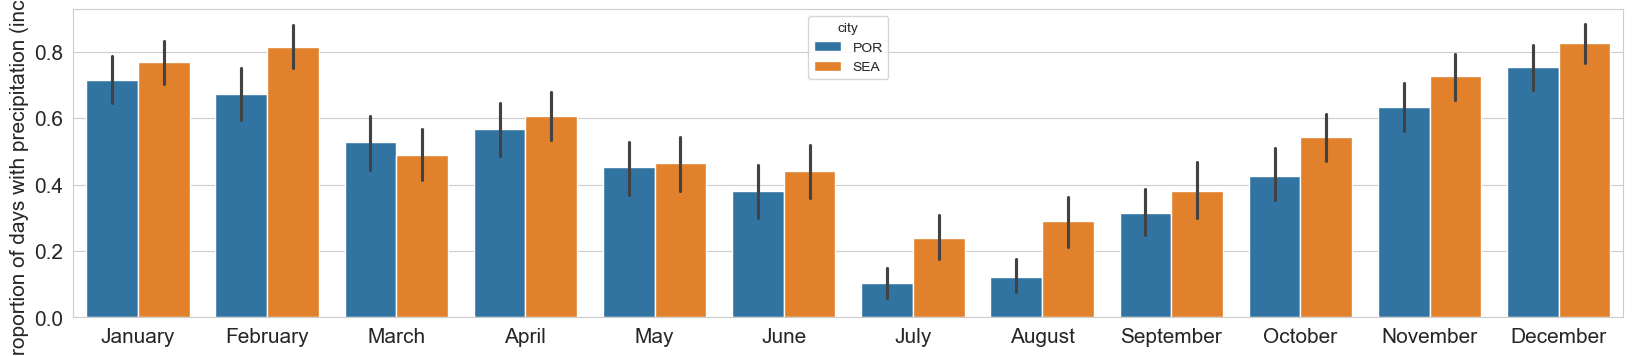

In [725]:
plt.figure(figsize=(20, 4))

sns.barplot(data=dfh, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion of days with precipitation (inches)', fontsize=15)
plt.xticks(ticks=range(12), labels=month_names)     
plt.tick_params(labelsize=15)

plt.show()

# Seattle experiences rain on more days, especially in February, July, August, and October

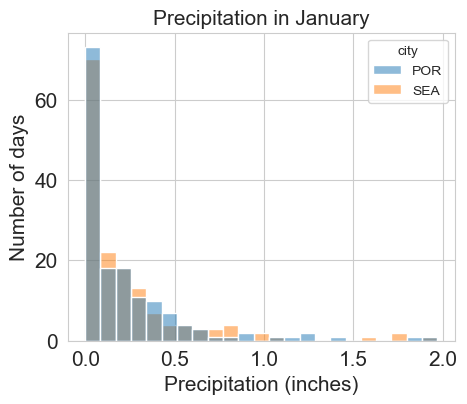

In [726]:
plt.figure(figsize=(5, 4))

sns.histplot(data=dfh.loc[dfh['month'] == 1], x='precipitation', hue='city')
                         
plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)
          
plt.tick_params(labelsize=15)
          
plt.show()

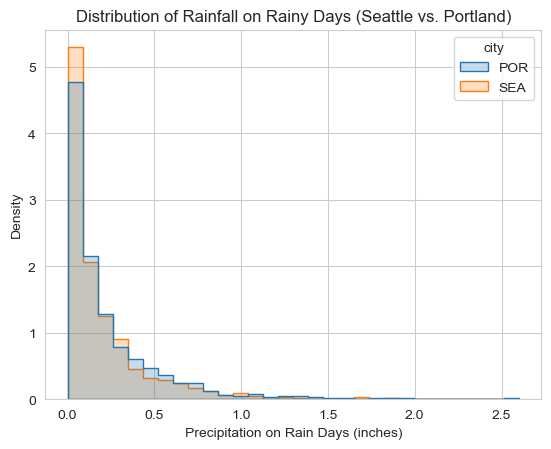

In [727]:
rain_dfh = dfh[dfh["precipitation"] > 0]
sns.histplot(data=rain_dfh, x="precipitation", hue="city", element="step", bins=30, stat="density", common_norm=False)
plt.title("Distribution of Rainfall on Rainy Days (Seattle vs. Portland)")
plt.xlabel("Precipitation on Rain Days (inches)")
plt.show()


# Most rainy days bring light rain. Seattle’s curve peaks higher near zero, showing more drizzle-level events, while Portland’s is flatter,
# indicating fewer light rain days but heavier rainfall when it occurs.

# statistical tests

In [728]:
from scipy import stats

In [729]:
significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
    sea_data = dfh.loc[(dfh['city'] == 'SEA') & (dfh['month'] == month), 'precipitation']
    por_data = dfh.loc[(dfh['city'] == 'POR') & (dfh['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, por_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month - 1] = 1

    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic:.2f}")
    print(f" p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
 t-statistic = 0.14
 p-value t test = 0.887
--------------------
Month 2:
 t-statistic = 1.75
 p-value t test = 0.081
--------------------
Month 3:
 t-statistic = -0.85
 p-value t test = 0.395
--------------------
Month 4:
 t-statistic = -0.48
 p-value t test = 0.634
--------------------
Month 5:
 t-statistic = -0.49
 p-value t test = 0.628
--------------------
Month 6:
 t-statistic = -0.11
 p-value t test = 0.913
--------------------
Month 7:
 t-statistic = 1.42
 p-value t test = 0.157
--------------------
Month 8:
 t-statistic = 2.32
 p-value t test = 0.021
--------------------
Month 9:
 t-statistic = -1.08
 p-value t test = 0.283
--------------------
Month 10:
 t-statistic = 0.58
 p-value t test = 0.560
--------------------
Month 11:
 t-statistic = 0.55
 p-value t test = 0.581
--------------------
Month 12:
 t-statistic = -0.38
 p-value t test = 0.707
--------------------


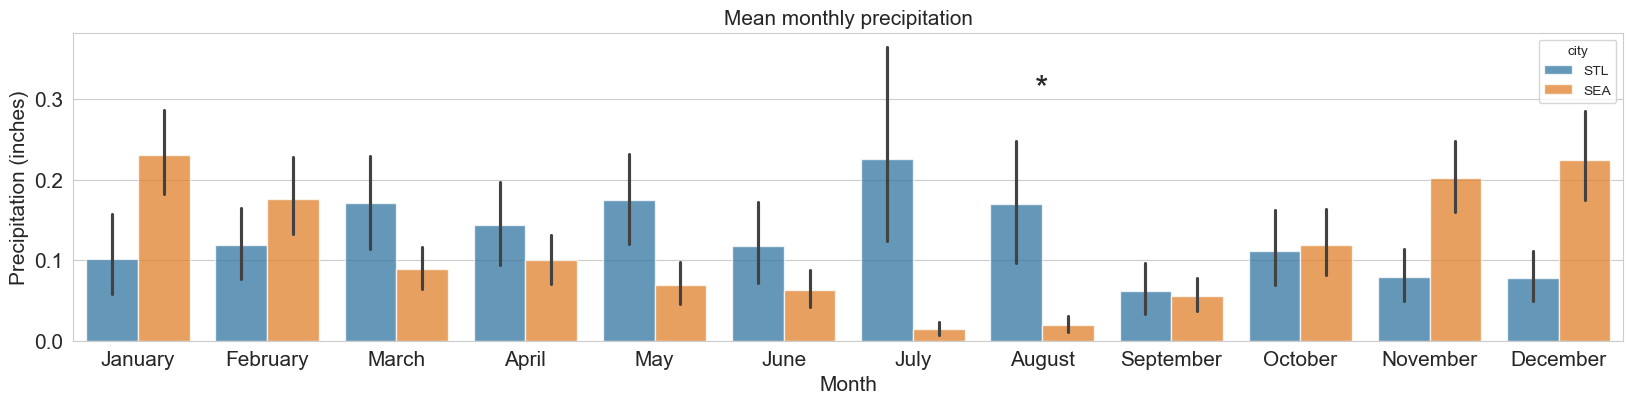

In [730]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)    

#add start for significantly different months
for month in range(12):
        if significantly_different[month] == 1:
            #add a start
            plt.text(month, 0.3, '*', ha='center', fontsize=25)


plt.show()

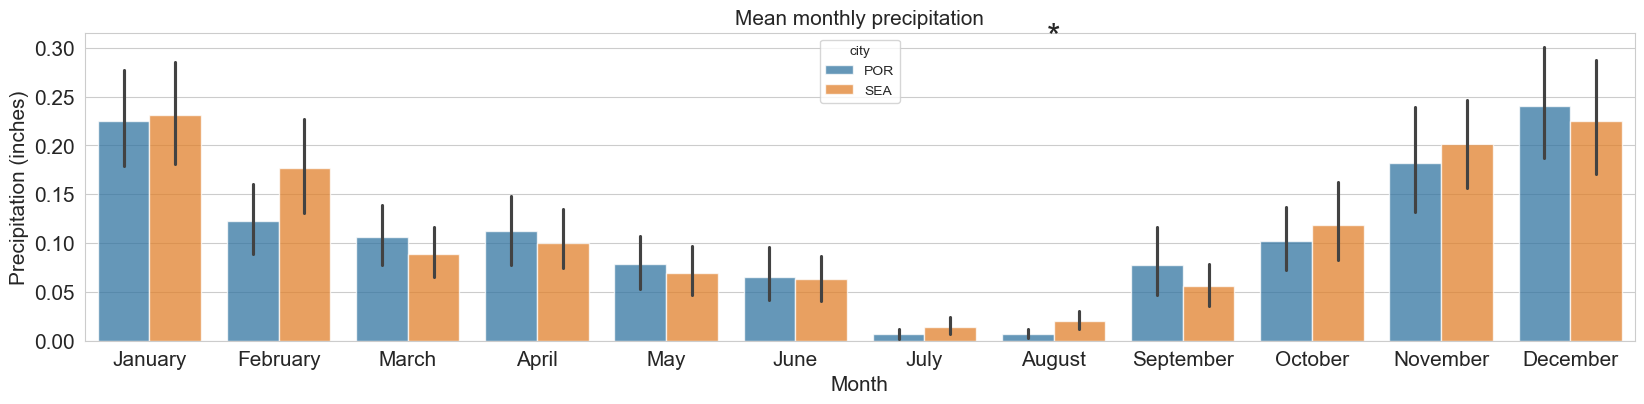

In [731]:
plt.figure(figsize=(20, 4))

sns.barplot(data=dfh, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)    

#add start for significantly different months
for month in range(12):
        if significantly_different[month] == 1:
            #add a start
            plt.text(month, 0.3, '*', ha='center', fontsize=25)


plt.show()

# Only August shows a significant difference (p ≈ 0.02), with Seattle slightly higher; other months are statistically similar.

In [732]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

#perform t-test for each month
for month in range(1, 13):

    #create a contingency table for Seattle and St. Louis for the current month:
    contingency_table = pd.crosstab(
        dfh.loc[dfh['month'] == month, 'city'], dfh.loc[dfh['month'] == month, 'any_precipitation']
    )

    #calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]

    #calculate the total number of days for each city
    total_counts = contingency_table.sum(axis=1)

    #hypothesis test
    zstat, p_value = proportions_ztest(
        count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
    )

    if p_value < significance_level:
         significantly_different_proportion[month - 1] = 1

    print(f"Month {month}:")
    print(f" z-statistic = {zstat:.2f}")
    print(f" p-value = {p_value:.3f}")
    print("-" * 20)
    

Month 1:
 z-statistic = -1.04
 p-value = 0.299
--------------------
Month 2:
 z-statistic = -2.73
 p-value = 0.006
--------------------
Month 3:
 z-statistic = 0.68
 p-value = 0.495
--------------------
Month 4:
 z-statistic = -0.70
 p-value = 0.482
--------------------
Month 5:
 z-statistic = -0.23
 p-value = 0.820
--------------------
Month 6:
 z-statistic = -1.06
 p-value = 0.291
--------------------
Month 7:
 z-statistic = -3.17
 p-value = 0.002
--------------------
Month 8:
 z-statistic = -3.65
 p-value = 0.000
--------------------
Month 9:
 z-statistic = -1.21
 p-value = 0.225
--------------------
Month 10:
 z-statistic = -2.05
 p-value = 0.041
--------------------
Month 11:
 z-statistic = -1.73
 p-value = 0.083
--------------------
Month 12:
 z-statistic = -1.53
 p-value = 0.125
--------------------


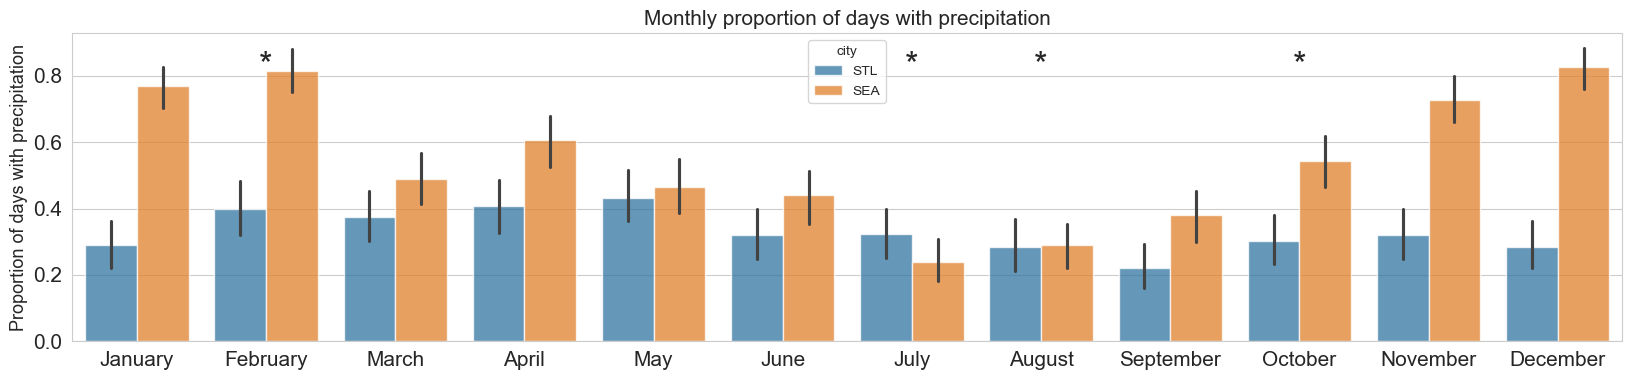

In [733]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion of days with precipitation', fontsize=13)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)    
plt.tick_params(labelsize=15)

#add start for significantly different months
for month in range(12):
        if significantly_different_proportion[month] == 1:
            #add a start
            plt.text(month, 0.8, '*', ha='center', fontsize=25)


plt.show()

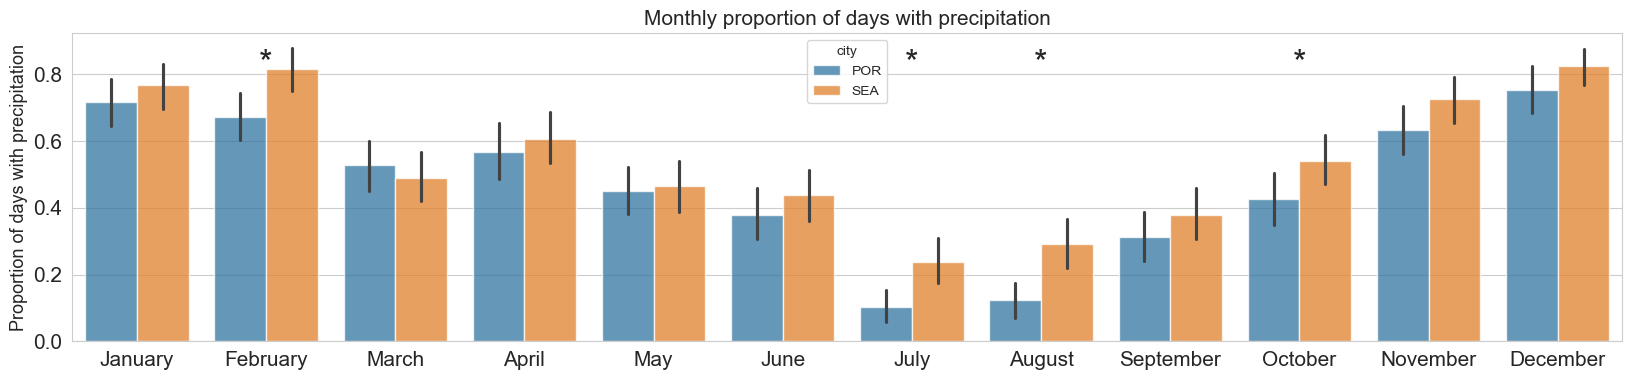

In [734]:
plt.figure(figsize=(20, 4))

sns.barplot(data=dfh, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion of days with precipitation', fontsize=13)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)    
plt.tick_params(labelsize=15)

#add start for significantly different months
for month in range(12):
        if significantly_different_proportion[month] == 1:
            #add a start
            plt.text(month, 0.8, '*', ha='center', fontsize=25)


plt.show()

# Seattle has significantly more rainy days in February, July, August, and October

In [735]:
annual_totals = dfh.groupby(['city', dfh['date'].dt.year])['precipitation'].sum().reset_index()
annual_means = annual_totals.groupby('city')['precipitation'].mean()
print(annual_means)


city
POR    40.373200
SEA    41.366333
Name: precipitation, dtype: float64


# Conclusion
Seattle and Portland receive about the same amount of rain each year, but Seattle’s rainfall occurs more often and in smaller amounts. The data support Seattle’s reputation for frequent drizzle, but not necessarily harder or longer. Portland, by contrast, experiences similar rainfall totals condensed into fewer, heavier events.